In [1]:
import time
import psutil
import numpy as np
import matplotlib.pyplot as plt

# To see the animations 
# pip install "notebook<7"

In [2]:
# %matplotlib notebook
# plt.rcParams['animation.html'] = 'jshtml'

%matplotlib widget

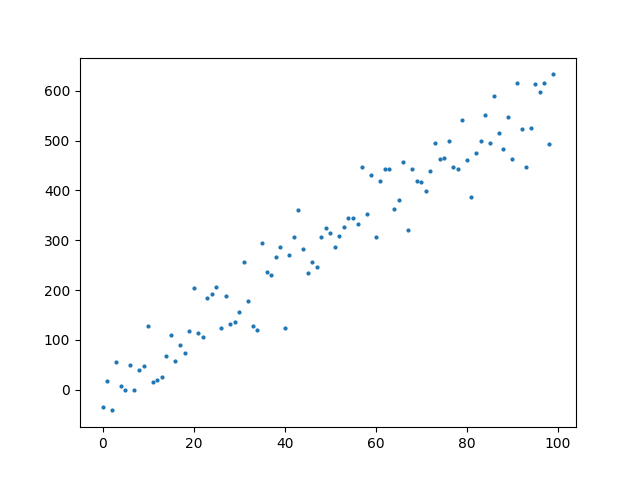

In [3]:
# Let us create some random data
data_size=100

mu, sigma = 1, 50 # mean and standard deviation
error=np.random.normal(mu, sigma, data_size)

x = np.arange(0 ,  data_size )
y = (6 * x) + error

plt.plot(x, y, 'o', markersize=2)

plt.show()

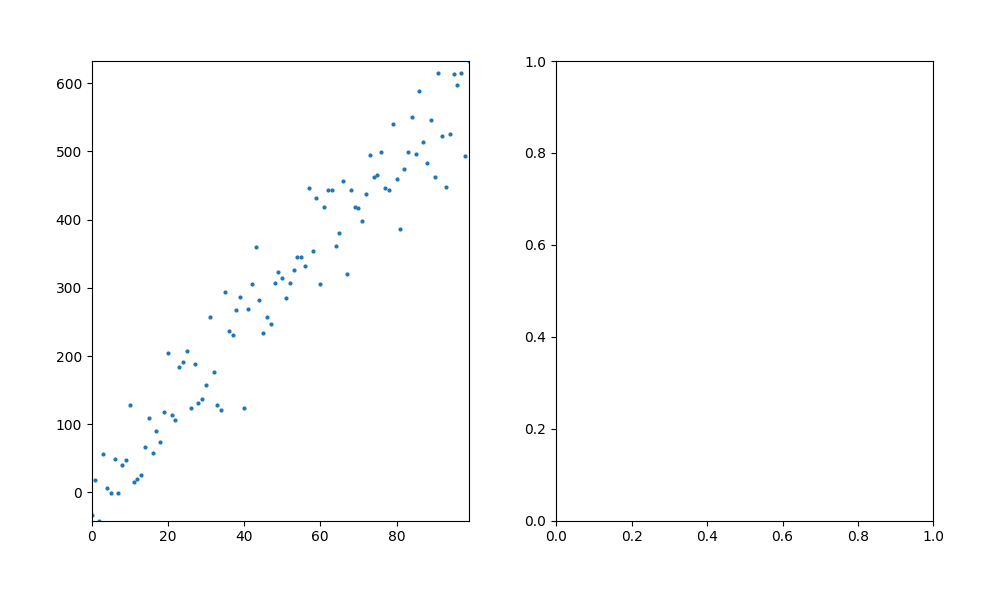

In [4]:
###### fig = plt.figure()
fig=plt.figure(figsize=(10,6), dpi= 100, facecolor='w', edgecolor='k')

# first subfigure 
ax1=plt.subplot(1, 2, 1)

ax1.set_xlim(left = np.min(x), right=np.max(x))
ax1.set_ylim(bottom = np.min(y), top=np.max(y))

ax1.plot(x, y, 'o', markersize=2)

# second sub-figure 
plt.subplot(1, 2, 2)
ax2 = plt.subplot(1, 2, 2)

plt.tight_layout(pad=4.0)


In [5]:
b_current = 0 
m_current = 0

learningRate = 0.00001
num_iteration = 200 

precision = 0.1


previous_step_size = 1 

n = float(len(y)) 
print("Sample size", n)


oldCost=0
# Start of iterations
# Capital X and Y are numpy Arrays
# These two variables are just for visualtion 
xx, costHist = [], [] 
y_prediction = m_current * x + b_current
initCost= (1/n) * sum (( y_prediction - y)**2)

ax2.set_xlim(left = 0, right=num_iteration)
ax2.set_ylim(bottom = 0, top=initCost)
# Let's start with main iterative part of gradient descent algorithm 

for i in range(num_iteration):
    
    # Calculate the prediction with current regression coefficients. 
    y_prediction = m_current * x + b_current
    
    # We compute costs just for monitoring 
    cost= (1/n) * sum (( y_prediction - y)**2)

    # calculate gradients. 
    m_gradient = (1.0/n) * sum (x*(y_prediction - y) )
    b_gradient = (1.0/n) * sum (y_prediction - y)
    
    # update the weights - Regression Coefficients 
    m_current = m_current - learningRate * m_gradient
    b_current = b_current - learningRate * b_gradient
    
    # Stop if the cost is not descreasing 
    if(abs(cost - oldCost) <= precision):
        print("Stoped at iteration", i)
        break
    
    oldCost = cost
    
    # Visualization 
    # abline(fig, ax1, m_current, b_current)
    x_vals = np.array(ax1.get_xlim())
    y_vals = m_current * x_vals  + b_current
    
    ax1.clear()
    ax1.set_xlim(left = np.min(x), right=np.max(x))
    ax1.set_ylim(bottom = np.min(y), top=np.max(y))
    ax1.plot(x, y, 'o', markersize=2)
    ax1.plot(x_vals, y_vals,  '-',  color='red', linewidth=2.0)
    # fig.canvas.draw()
    
    # Update the Cost Diagram. 
    xx.append(i)
    costHist.append(cost)    
    ax2.plot(xx, costHist, color='blue')


    fig.canvas.draw()

    # to demonstrate it slowly we sleep for 0.5 seconds (500 milliseconds) in between each iteration.
    time.sleep(0.5)
    # Remove the above sleep time when you implement it. 

    
    if(i % 1 ==0):
        print("Iteration No.=", i ," m = ", m_current, " b=", b_current, " Cost=", cost) 

print("m = ", m_current, " b=", b_current)

Sample size 100.0
Iteration No.= 0  m =  0.19861946416330922  b= 0.0029902382267039014  Cost= 122369.81147026762
Iteration No.= 1  m =  0.390715778052894  b= 0.005882129916264698  Cost= 114607.67672559306
Iteration No.= 2  m =  0.5765031779895279  b= 0.008678905011533254  Cost= 107347.02477428076
Iteration No.= 3  m =  0.7561888642455702  b= 0.011383687376082223  Cost= 100555.45666933637
Iteration No.= 4  m =  0.9299732321261249  b= 0.013999498278110804  Cost= 94202.6666398033
Iteration No.= 5  m =  1.0980500954609251  b= 0.016529259759929492  Cost= 88260.30685840655
Iteration No.= 6  m =  1.2606069027561937  b= 0.018975797896782633  Cost= 82701.86094605946
Iteration No.= 7  m =  1.4178249462475445  b= 0.02134184594864325  Cost= 77502.52564877534
Iteration No.= 8  m =  1.569879564087071  b= 0.023630047408495128  Cost= 72639.10015899596
Iteration No.= 9  m =  1.716940335890114  b= 0.025842958950501843  Cost= 68089.88258745956
Iteration No.= 10  m =  1.859171271859791  b= 0.0279830532813